# **Project 3 Report**

Vincent Ha

CS458 

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from sklearn import datasets
from sklearn import tree
import pydotplus
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC
from sklearn.inspection import DecisionBoundaryDisplay

## **P3-1. Decision Tree**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 
'talk.religion.misc', 'comp.graphics', 'sci.space']**

In [112]:
# Codes for P3-1(a)
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
trainData = fetch_20newsgroups(subset="train",categories=categories)
testData = fetch_20newsgroups(subset="test",categories=categories)

vectorizor= TfidfVectorizer()

vectTrain = vectorizor.fit_transform(trainData.data)
vectTest = vectorizor.transform(testData.data)

**(b) Build classifiers using the following methods:
<br> Support Vector Machine (sklearn.svm.LinearSVC) 
<br> Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)                                                               <br>  K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)                                                             <br>  Random forest (sklearn.ensemble.RandomForestClassifier)                                                                   <br>   AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)                                                               <br> Optimize the hyperparameters of these methods and compare the results of these methods.**

In [113]:
# Codes for P3-1(b)
#Support Vector Machine
clf = LinearSVC(C = 2)
clf.fit(vectTrain, trainData.target)
Y_predTrain = clf.predict(vectTrain)
Y_predTest = clf.predict(vectTest)
print("Support Vector Machine Classifier: ",accuracy_score(testData.target, Y_predTest))

#Naive Bayes Classifiers
clf = MultinomialNB(alpha = .1)
clf.fit(vectTrain, trainData.target)
Y_predTrain = clf.predict(vectTrain)
Y_predTest = clf.predict(vectTest)
print("Naive bayes Classifier: ",accuracy_score(testData.target, Y_predTest))

#K-nearest neighbors
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(vectTrain, trainData.target)
Y_predTrain = clf.predict(vectTrain)
Y_predTest = clf.predict(vectTest)
print("K-Nearest Neighbors Classifier: ",accuracy_score(testData.target, Y_predTest))

#Random Forest
clf = RandomForestClassifier(min_samples_split=5)
clf.fit(vectTrain, trainData.target)
Y_predTrain = clf.predict(vectTrain)
Y_predTest = clf.predict(vectTest)
print("Random Forest Classifier: ",accuracy_score(testData.target, Y_predTest))

#AdaBoost
clf = AdaBoostClassifier(learning_rate=.5, n_estimators=40)
clf.fit(vectTrain, trainData.target)
Y_predTrain = clf.predict(vectTrain)
Y_predTest = clf.predict(vectTest)
print("Ada Boost Classifier: ", accuracy_score(testData.target, Y_predTest))

Support Vector Machine Classifier:  0.9538461538461539
Naive bayes Classifier:  0.9538461538461539
K-Nearest Neighbors Classifier:  0.8783216783216783
Random Forest Classifier:  0.8839160839160839
Ada Boost Classifier:  0.7888111888111888


**Discuss the results here.**
The Results show that the Ada Boost Classifier was the least accurate and the Naive Bayes and Support Vector Machine being equally the most accurate. Optimization was through trial and error of changing out values to find the parameters that provide the most accuracy. 

# **P3-2. Recongize hand-written digits**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits. To build your classifier, you can use: sklearn.neural_network.MLPClassifier**

In [114]:
# Codes for P3-1(a)
digits = datasets.load_digits()
xDigits, yDigits = digits.data, digits.target

#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xDigits, yDigits, test_size=0.5, random_state=1)

clf = MLPClassifier(random_state=1, max_iter=1000, alpha=.001, solver = 'lbfgs')
clf.fit(X_test, Y_test)


MLPClassifier(alpha=0.001, max_iter=1000, random_state=1, solver='lbfgs')

**(b) Optimize the hyperparameters of your neural network to maximize the classification acuracy. Show the confusion matrix of your neural network. Discuss and compare your results.**

0.9610244988864143
1.0


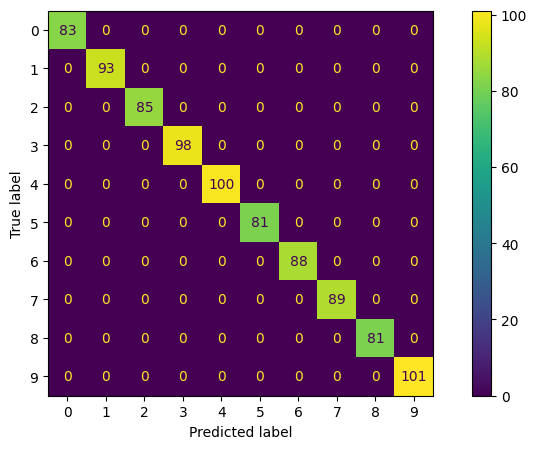

In [115]:
# Codes for P3-2(b)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
print(accuracy_score(Y_train, Y_predTrain))
print(accuracy_score(Y_test, Y_predTest))

fig, axs = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest, ax=axs)


**Discuss your results here.**
The confusion matrix shows the effect of the classification, which ends up accurately predicting and labeling every true label in the confusion matrix. The MLP classifier was very accurate in its usage in identifying the handwritten numbers based on these results.

# **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points**

In [117]:
#code for P3-3(a)
np.random.seed(0) 
X = np.random.rand(300, 2)*10-5 
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) 

**(b) Develope a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

In [118]:
# Codes for P3-3(b)
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
clf = NuSVC(kernel='poly', degree= 2)
clf.fit(X,Y)

NuSVC(degree=2, kernel='poly')

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

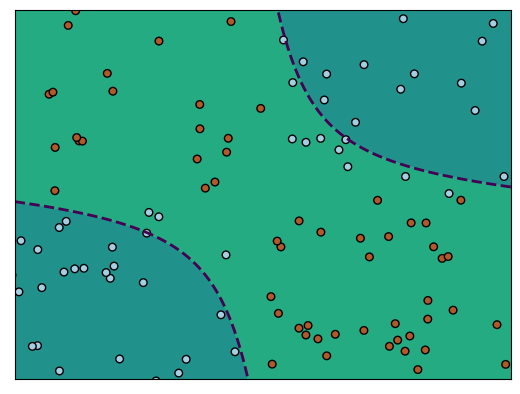

In [119]:

# plot the decision function for each datapoint on the grid
disp = DecisionBoundaryDisplay.from_estimator(clf, X)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()